In [85]:
# Manipulação e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns
# Manipulação de datas
from datetime import date
# Análise estatística
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
# Modelagem
import itertools

In [86]:
import  warnings 
warnings.simplefilter('ignore')

In [87]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

In [88]:
df = pd.read_csv("Data/AirPassengers.csv", sep=",")
df = df.set_index('time')
df.head(2)

,target
time,
1949-01,112
1949-02,118


<AxesSubplot:xlabel='time'>

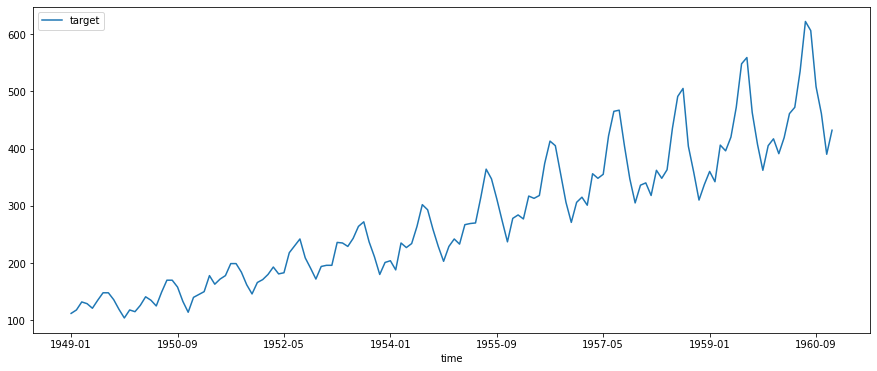

In [89]:
df.plot()

In [90]:
print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


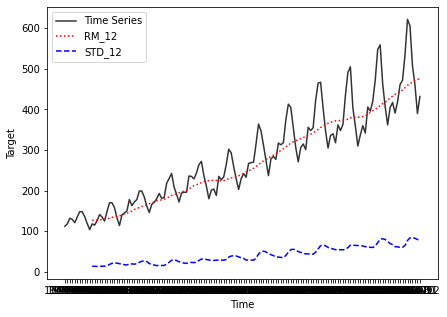

In [91]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(df['target'], color='black', label='Time Series', alpha=0.8)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [92]:
from statsmodels.tsa.stattools import adfuller

adf = adfuller(df)
print(f'p-valor: {round(adf[1],2)}')

p-valor: 0.99


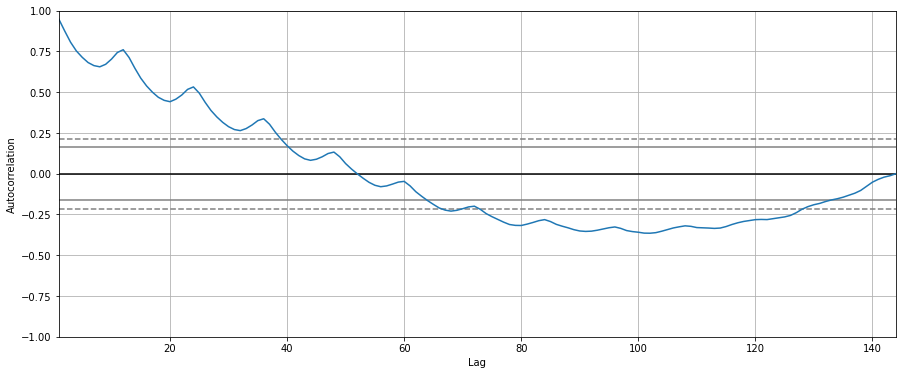

In [93]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df).plot();

In [94]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

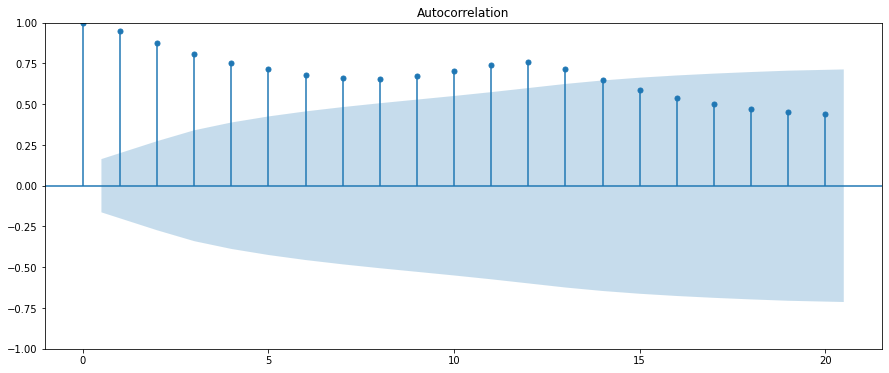

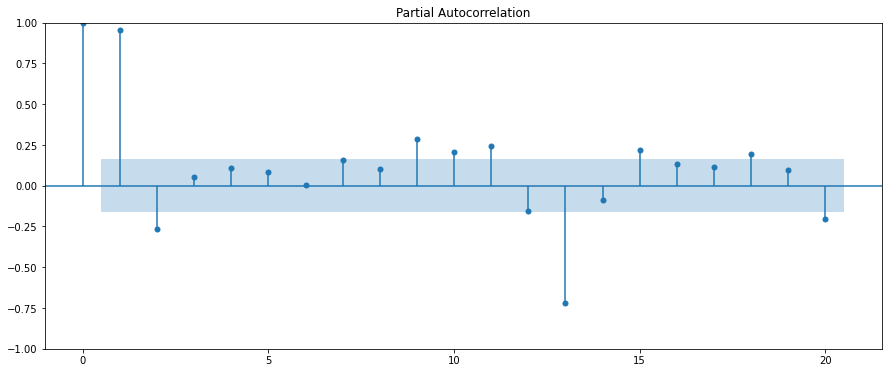

In [95]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
pyplot.show()

In [96]:
# Primeira diff
# plot_acf(df.diff().dropna(), lags=20);
# plot_pacf(df.diff().dropna(), lags=20)
# Segunda diff
# plot_acf(df.diff().diff().dropna(), lags=20);
# plot_pacf(df.diff().diff().dropna(), lags=20);

In [97]:
import pmdarima as pm

modelo_autoarima = pm.auto_arima(df, max_p=5 , max_q=5, max_d=2
                                 , max_P=2, max_Q=2, max_D=2, m=12
                                 , seasonal=True, trace=True, information_criterion='bic'
                                 , stepwise=True)

Performing stepwise search to minimize bic
 ARIMA(2,1,2)(1,1,1)[12]             : BIC=1040.174, Time=1.32 sec
 ARIMA(0,1,0)(0,1,0)[12]             : BIC=1034.383, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : BIC=1029.019, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : BIC=1029.628, Time=0.20 sec
 ARIMA(1,1,0)(0,1,0)[12]             : BIC=1026.144, Time=0.04 sec
 ARIMA(1,1,0)(0,1,1)[12]             : BIC=1029.539, Time=0.17 sec
 ARIMA(1,1,0)(1,1,1)[12]             : BIC=1031.994, Time=0.43 sec
 ARIMA(2,1,0)(0,1,0)[12]             : BIC=1031.019, Time=0.08 sec
 ARIMA(1,1,1)(0,1,0)[12]             : BIC=1031.019, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : BIC=1026.389, Time=0.05 sec
 ARIMA(2,1,1)(0,1,0)[12]             : BIC=1029.348, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : BIC=1030.968, Time=0.10 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.956 seconds


In [98]:
train = df.loc[:'1959-12']
test = df.loc['1960-01':]

In [99]:
import pmdarima as pm

modelo_autoarima = pm.auto_arima(train, seasonal=True, trace=True, m=12
                                 , information_criterion='aic', stepwise=True)
modelo_autoarima

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.35 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.34 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.05 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.04 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.33 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.046, Time=2.81 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.25 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.48 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.13 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.34 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True)

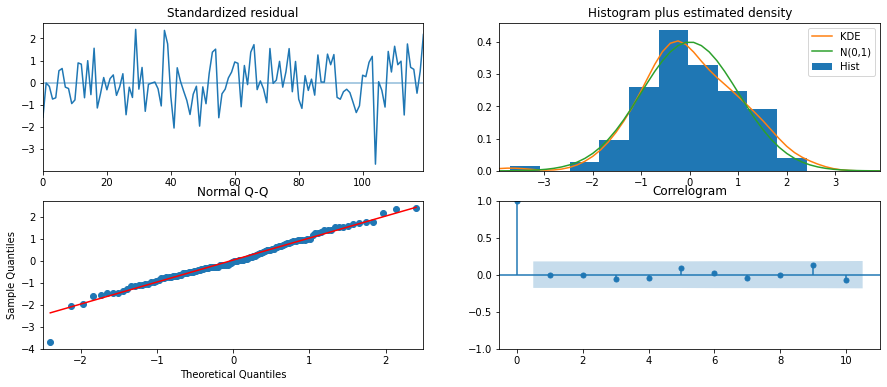

In [100]:
modelo_autoarima.plot_diagnostics();

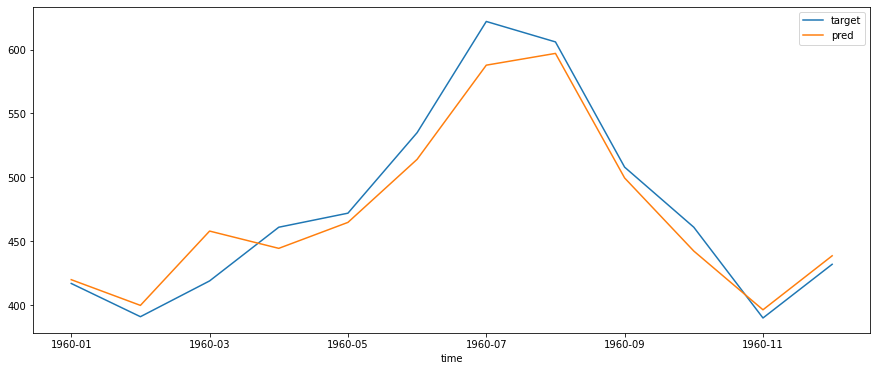

In [101]:
pred = modelo_autoarima.predict(n_periods=len(test))
pred_df = pd.DataFrame(pred, index=test.index, columns=['pred'])
pred_df = pd.concat([test, pred_df], axis=1)#.plot(linewidth=2)
pred_df.plot();
# pred_df

<AxesSubplot:xlabel='time'>

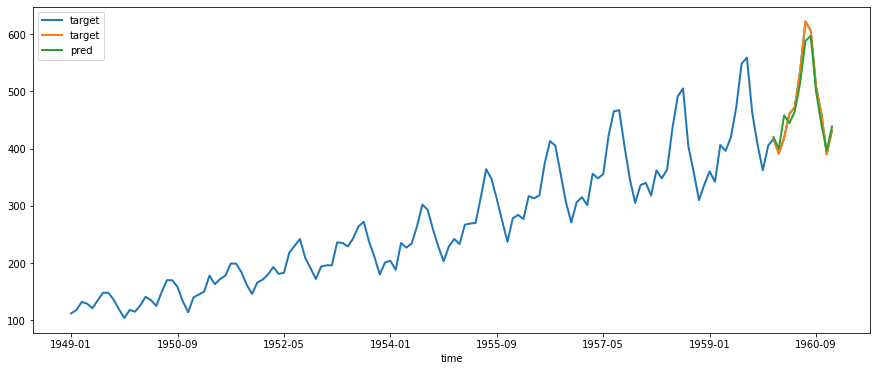

In [102]:
pd.concat([df, pred_df], axis=1).plot(linewidth=2)

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('SARIMA model Results')
print('mse', round(mean_squared_error(pred_df.target, pred_df.pred),2))
print('mae', round(mean_absolute_error(pred_df.target, pred_df.pred),2))

SARIMA model Results
mse 343.6
mae 14.9
